In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data_train = pd.read_csv('C:/Users/sunny.DESKTOP-QGFGEEK/Desktop/GitClone/1_camera_gait_analysis/matched_excel/sum1-9.csv')
data_test = pd.read_csv('C:/Users/sunny.DESKTOP-QGFGEEK/Desktop/GitClone/1_camera_gait_analysis/matched_excel/walkR10.csv')

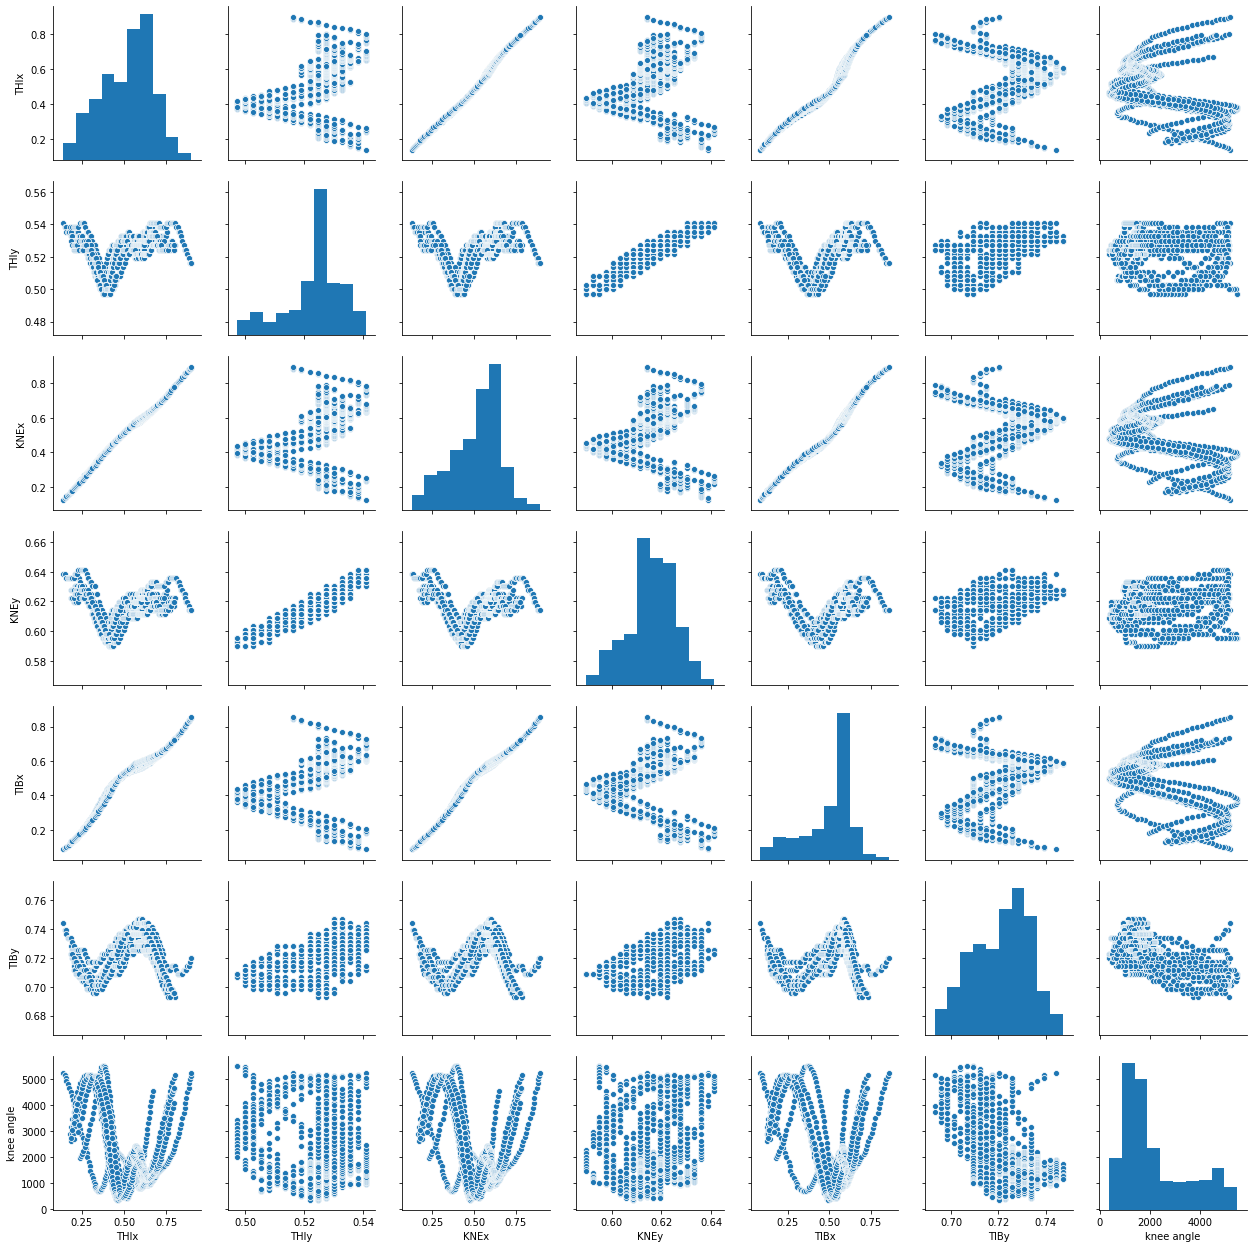

In [4]:
sns.pairplot(data_train)
fig = plt.gcf()
fig.patch.set_color('white')

---

In [5]:
features = [
    'THIx',
    'THIy',
#     'KNEx',
    'KNEy',
#     'TIBx',
    'TIBy',
]

X_train, y_train = data_train[features], data_train['knee angle']
X_test, y_test = data_test[features], data_test['knee angle']

In [6]:
X_train.columns

Index(['THIx', 'THIy', 'KNEy', 'TIBy'], dtype='object')

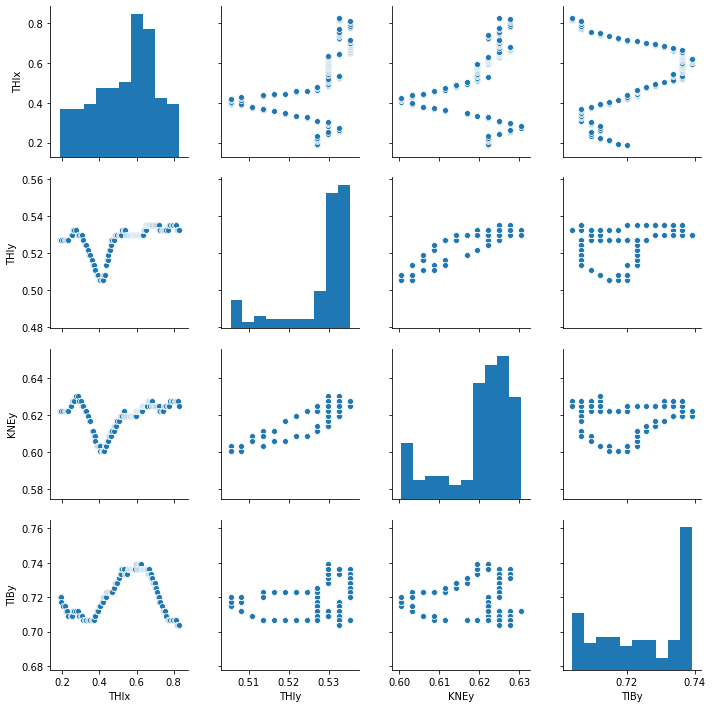

In [10]:
sns.pairplot(X_test)

In [8]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [9]:
steps = [
    ('scale', MinMaxScaler()),
#     ('pca', PCA(n_components=3)),
#     ('predictor', RidgeCV(alphas=np.logspace(-6, 6, 13))),
    ('predictor', SVR(kernel='linear', C=1e9, gamma='auto')),
]

model = Pipeline(steps)

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)/100 - 10
rmse = np.mean((y_test_pred - (y_test/100 - 10))**2) ** 0.5
rmse

4.994620198912918